In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import acquire as acq
import prep
import graphviz
from env import get_db_url
from pydataset import data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

#ignore warnings
import warnings
warnings.filterwarnings('ignore')


Reading from CSV file...


### Using the titanic data:

What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.

In [2]:
titanic_df = acq.get_titanic_data()
titanic_df_clean, train, validate, test = prep.prep_titanic(titanic_df)
train.info()


Reading from CSV file...
Reading from CSV file...
<class 'pandas.core.frame.DataFrame'>
Int64Index: 498 entries, 850 to 421
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 498 non-null    int64  
 1   pclass                   498 non-null    int64  
 2   sibsp                    498 non-null    int64  
 3   parch                    498 non-null    int64  
 4   fare                     498 non-null    float64
 5   alone                    498 non-null    int64  
 6   sex_male                 498 non-null    uint8  
 7   embark_town_Queenstown   498 non-null    uint8  
 8   embark_town_Southampton  498 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 28.7 KB


In [3]:
print(f'Survival rate on the Titanic: {titanic_df_clean.survived.mean():.2%}')
print(f'Number of survivors: {len(titanic_df_clean[titanic_df_clean.survived == 1])}')
print(f'Number who perished: {len(titanic_df_clean[titanic_df_clean.survived == 0])}')

Survival rate on the Titanic: 38.38%
Number of survivors: 342
Number who perished: 549


In [4]:
validate.info()
#test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 214 entries, 307 to 607
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   survived                 214 non-null    int64  
 1   pclass                   214 non-null    int64  
 2   sibsp                    214 non-null    int64  
 3   parch                    214 non-null    int64  
 4   fare                     214 non-null    float64
 5   alone                    214 non-null    int64  
 6   sex_male                 214 non-null    uint8  
 7   embark_town_Queenstown   214 non-null    uint8  
 8   embark_town_Southampton  214 non-null    uint8  
dtypes: float64(1), int64(5), uint8(3)
memory usage: 12.3 KB


Tree building first, then... Idk

In [5]:
X_train = train.drop(columns= ['survived'])
y_train = train.survived

X_validate = validate.drop(columns= ['survived'])
y_validate = validate.survived

X_test = test.drop(columns=['survived'])
y_test = test.survived

clf = DecisionTreeClassifier(max_depth=3, random_state=302)
clf.fit(X_train, y_train)



DecisionTreeClassifier(max_depth=3, random_state=302)

[Text(558.0, 570.7800000000001, 'sex_male <= 0.5\ngini = 0.473\nsamples = 498\nvalue = [307, 191]'),
 Text(279.0, 407.70000000000005, 'pclass <= 2.5\ngini = 0.392\nsamples = 179\nvalue = [48, 131]'),
 Text(139.5, 244.62, 'fare <= 149.035\ngini = 0.118\nsamples = 95\nvalue = [6, 89]'),
 Text(69.75, 81.53999999999996, 'gini = 0.093\nsamples = 82\nvalue = [4, 78]'),
 Text(209.25, 81.53999999999996, 'gini = 0.26\nsamples = 13\nvalue = [2, 11]'),
 Text(418.5, 244.62, 'parch <= 0.5\ngini = 0.5\nsamples = 84\nvalue = [42, 42]'),
 Text(348.75, 81.53999999999996, 'gini = 0.457\nsamples = 51\nvalue = [18, 33]'),
 Text(488.25, 81.53999999999996, 'gini = 0.397\nsamples = 33\nvalue = [24, 9]'),
 Text(837.0, 407.70000000000005, 'fare <= 15.173\ngini = 0.305\nsamples = 319\nvalue = [259, 60]'),
 Text(697.5, 244.62, 'fare <= 13.25\ngini = 0.204\nsamples = 200\nvalue = [177, 23]'),
 Text(627.75, 81.53999999999996, 'gini = 0.213\nsamples = 190\nvalue = [167, 23]'),
 Text(767.25, 81.53999999999996, 'gini

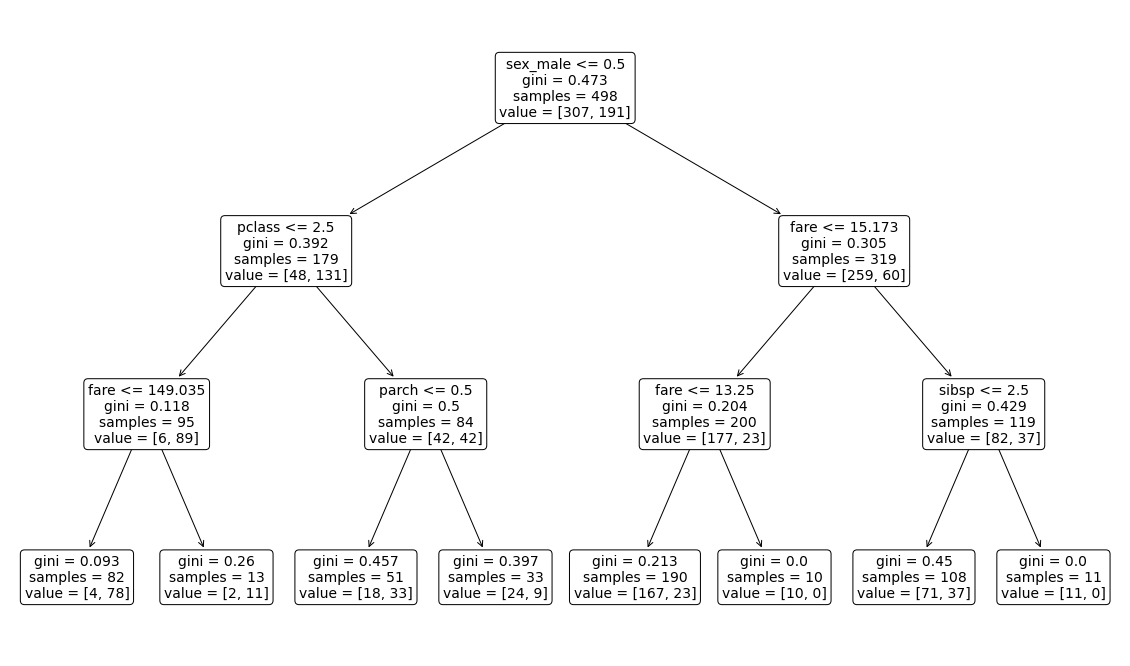

In [6]:
plt.figure(figsize=(20, 12))
plot_tree(clf, feature_names=X_train.columns, rounded=True)

In [9]:
import sklearn.tree

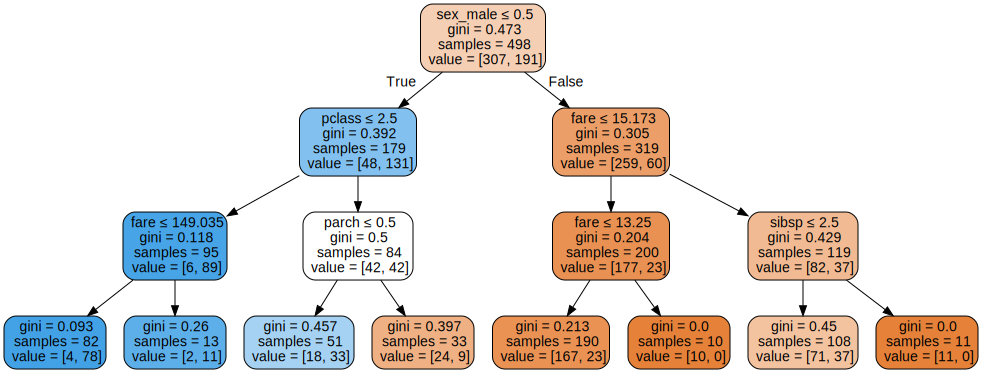

In [10]:
titan_data = sklearn.tree.export_graphviz(clf, feature_names= X_train.columns,
    filled= True, rounded= True, 
    special_characters= True)
graph = graphviz.Source(titan_data)
graph

In [11]:
train_predicts = clf.predict(X_train)
actual = y_train

print(classification_report(actual, train_predicts))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86       307
           1       0.84      0.64      0.72       191

    accuracy                           0.81       498
   macro avg       0.82      0.78      0.79       498
weighted avg       0.82      0.81      0.81       498



In [12]:
validate_predicts = clf.predict(X_validate)
valid_actual = y_validate

print(classification_report(valid_actual, validate_predicts))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84       132
           1       0.78      0.62      0.69        82

    accuracy                           0.79       214
   macro avg       0.79      0.76      0.77       214
weighted avg       0.79      0.79      0.78       214



In [13]:
print(clf.score(X_train, y_train))
print(clf.score(X_validate, y_validate))

0.8132530120481928
0.7897196261682243


In [14]:
model_two = DecisionTreeClassifier(max_depth=2, random_state=302)

model_two.fit(X_train, y_train)

model_two_predicts = model_two.predict(X_train)
model_two_actual = y_train

print(classification_report(model_two_actual, model_two_predicts))


              precision    recall  f1-score   support

           0       0.75      0.98      0.85       307
           1       0.94      0.47      0.62       191

    accuracy                           0.78       498
   macro avg       0.84      0.72      0.74       498
weighted avg       0.82      0.78      0.76       498



In [15]:
model_two.fit(X_validate, y_validate)

model2_val_pred = model_two.predict(X_validate)
model2_val_act = y_validate

print(classification_report(model2_val_act, model2_val_pred))

              precision    recall  f1-score   support

           0       0.77      0.98      0.86       132
           1       0.96      0.52      0.68        82

    accuracy                           0.81       214
   macro avg       0.86      0.75      0.77       214
weighted avg       0.84      0.81      0.79       214



In [16]:
print(model_two.score(X_train, y_train))
print(model_two.score(X_validate, y_validate))

0.7831325301204819
0.8084112149532711


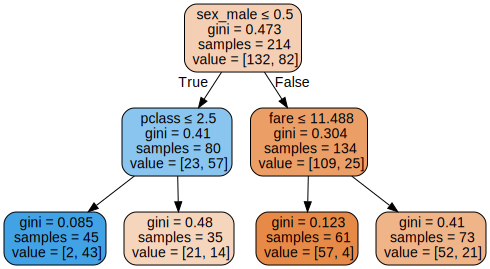

In [19]:
model2_data = sklearn.tree.export_graphviz(model_two, feature_names= X_train.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(model2_data)
graph

In [17]:
telco_df = acq.get_telco_data()


Reading from CSV file...


In [18]:
telco_df_clean, telco_train, telco_validate, telco_test = prep.prep_telco(telco_df)

telco_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 5981 to 1671
Data columns (total 51 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   customer_id                            3937 non-null   object 
 1   gender                                 3937 non-null   object 
 2   senior_citizen                         3937 non-null   int64  
 3   partner                                3937 non-null   object 
 4   dependents                             3937 non-null   object 
 5   tenure                                 3937 non-null   int64  
 6   phone_service                          3937 non-null   object 
 7   multiple_lines                         3937 non-null   object 
 8   internet_service_type_id               3937 non-null   int64  
 9   online_security                        3937 non-null   object 
 10  online_backup                          3937 non-null   object 
 11  d

In [45]:
telco_train['baseline'] = 1
telco_train[(telco_train.baseline == telco_train.churn_Yes)].mean()

senior_citizen                              0.265774
tenure                                     17.813576
internet_service_type_id                    1.822180
contract_type_id                            1.135755
payment_type_id                             1.803059
monthly_charges                            74.407839
total_charges                            1510.136711
gender_Male                                 0.486616
partner_Yes                                 0.352772
dependents_Yes                              0.155832
phone_service_Yes                           0.907266
multiple_lines_No phone service             0.092734
multiple_lines_Yes                          0.449331
online_security_No internet service         0.059273
online_security_Yes                         0.153920
online_backup_No internet service           0.059273
online_backup_Yes                           0.270554
device_protection_No internet service       0.059273
device_protection_Yes                       0.

In [19]:
telco_df_clean.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies_Yes,paperless_billing_Yes,churn_Yes,contract_type_One year,contract_type_Two year,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check,internet_service_type_Fiber optic,internet_service_type_None
0,0002-ORFBO,Female,0,Yes,Yes,9,Yes,No,1,No,...,0,1,0,1,0,0,0,1,0,0
1,0003-MKNFE,Male,0,No,No,9,Yes,Yes,1,No,...,1,0,0,0,0,0,0,1,0,0
2,0004-TLHLJ,Male,0,No,No,4,Yes,No,2,No,...,0,1,1,0,0,0,1,0,1,0
3,0011-IGKFF,Male,1,Yes,No,13,Yes,No,2,No,...,1,1,1,0,0,0,1,0,1,0
4,0013-EXCHZ,Female,1,Yes,No,3,Yes,No,2,No,...,0,1,1,0,0,0,0,1,1,0


In [26]:
X_telco_train = telco_train.drop(columns= ['churn_Yes'])
y_telco_train = telco_train.churn_Yes

X_telco_validate = telco_validate.drop(columns= ['churn_Yes'])
y_telco_validate = telco_validate.churn_Yes

X_telco_test = telco_test.drop(columns= ['churn_Yes'])
y_telco_test = telco_test.churn_Yes

telco_model1 = DecisionTreeClassifier(max_depth= 3, random_state=302)

X_telco_train.head()
print(y_telco_train.sum())
print(len(y_telco_train))

1046
3937


In [34]:
X_telco_train = X_telco_train.select_dtypes(include=np.number)

In [36]:
X_telco_validate = X_telco_validate.select_dtypes(include=np.number)
X_telco_test = X_telco_test.select_dtypes(include=np.number)

In [39]:
X_telco_train.columns

Index(['senior_citizen', 'tenure', 'internet_service_type_id',
       'contract_type_id', 'payment_type_id', 'monthly_charges',
       'total_charges', 'gender_Male', 'partner_Yes', 'dependents_Yes',
       'phone_service_Yes', 'multiple_lines_No phone service',
       'multiple_lines_Yes', 'online_security_No internet service',
       'online_security_Yes', 'online_backup_No internet service',
       'online_backup_Yes', 'device_protection_No internet service',
       'device_protection_Yes', 'tech_support_No internet service',
       'tech_support_Yes', 'streaming_tv_No internet service',
       'streaming_tv_Yes', 'streaming_movies_No internet service',
       'streaming_movies_Yes', 'paperless_billing_Yes',
       'contract_type_One year', 'contract_type_Two year',
       'payment_type_Credit card (automatic)', 'payment_type_Electronic check',
       'payment_type_Mailed check', 'internet_service_type_Fiber optic',
       'internet_service_type_None'],
      dtype='object')

In [35]:
telco_model1.fit(X_telco_train, y_telco_train)

telco_model1_predicts = telco_model1.predict(X_telco_train)
telco_model1_actual = y_telco_train



print(classification_report(telco_model1_actual, telco_model1_predicts))

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      2891
           1       0.70      0.41      0.51      1046

    accuracy                           0.80      3937
   macro avg       0.75      0.67      0.69      3937
weighted avg       0.78      0.80      0.78      3937



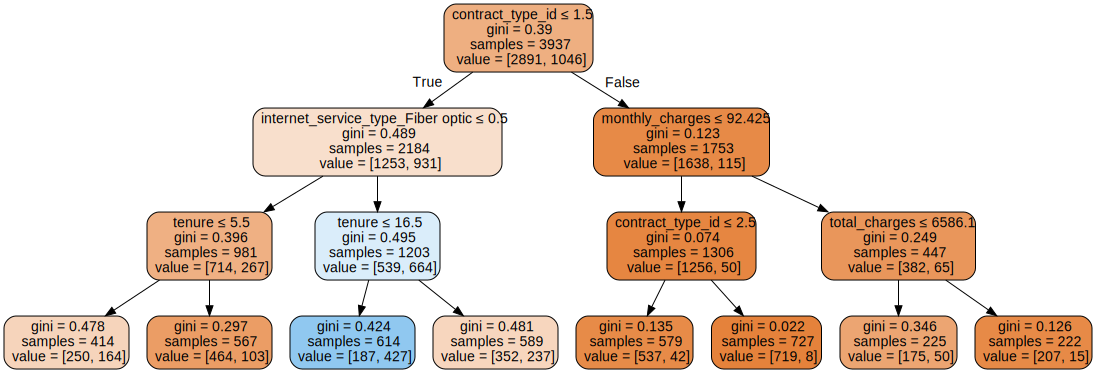

In [38]:
telco_model1_data = sklearn.tree.export_graphviz(telco_model1, out_file=None,feature_names= X_telco_train.columns, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(telco_model1_data)
graph

In [40]:
telco_model2 = DecisionTreeClassifier(max_depth=2, random_state=302)
telco_model2.fit(X_telco_train, y_telco_train)

telco_model2_predicts = telco_model2.predict(X_telco_train)
telco_model2_actual = y_telco_train

print(classification_report(telco_model2_actual, telco_model2_predicts))

              precision    recall  f1-score   support

           0       0.86      0.81      0.84      2891
           1       0.55      0.63      0.59      1046

    accuracy                           0.77      3937
   macro avg       0.71      0.72      0.71      3937
weighted avg       0.78      0.77      0.77      3937



In [41]:
print(f'Model 1 score: {telco_model1.score(X_telco_train, y_telco_train)}')
print(f'Model 2 score: {telco_model2.score(X_telco_train, y_telco_train)}')


Model 1 score: 0.7952755905511811
Model 2 score: 0.7660655321310642
